In [1]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

import pylab as pl
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
random_state = np.random.RandomState(0)



filename = 'pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, header = 1, names=names)

array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.50, random_state=1)
classifier1 = LogisticRegression()
classifier2 = svm.SVC(kernel='linear', probability=True)
probas1_ = classifier1.fit(X_train, y_train).predict_proba(X_test)
probas2_ = classifier2.fit(X_train, y_train).predict_proba(X_test)

/Users/shivank/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [2]:
# Compute ROC curve and area the curve for logistic
fpr1, tpr1, thresholds1 = roc_curve(y_test, probas1_[:, 1])
roc_auc1 = auc(fpr1, tpr1)
print("Area under the ROC curve : %f" % roc_auc1)

Area under the ROC curve : 0.825029


In [3]:
# Compute ROC curve and area the curve
fpr2, tpr2, thresholds2 = roc_curve(y_test, probas2_[:, 1])
roc_auc2 = auc(fpr2, tpr2)
print("Area under the ROC curve : %f" % roc_auc2)

Area under the ROC curve : 0.832070


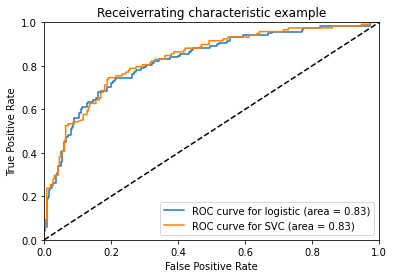

In [4]:
# Plot the ROC

# Plot ROC curve
pl.clf()
pl.plot(fpr1, tpr1, label='ROC curve for logistic (area = %0.2f)' % roc_auc1)
pl.plot(fpr2, tpr2, label='ROC curve for SVC (area = %0.2f)' % roc_auc2)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiverrating characteristic example')
pl.legend(loc="lower right")
pl.show()

In [5]:
import pandas as pd

i = np.arange(len(tpr1)) # index for df
roc1 = pd.DataFrame({'fpr1' : pd.Series(fpr1, index=i),'tpr1' : pd.Series(tpr1, index = i), '1-fpr1' : pd.Series(1-fpr1, index = i), 'tf1' : pd.Series(tpr1 - (1-fpr1), index = i), 'thresholds1' : pd.Series(thresholds1, index = i)})
print(roc1.loc[(roc1.tf1-0).abs().argsort()[:1]])

i = np.arange(len(tpr2)) # index for df
roc2 = pd.DataFrame({'fpr2' : pd.Series(fpr2, index=i),'tpr2' : pd.Series(tpr2, index = i), '1-fpr2' : pd.Series(1-fpr2, index = i), 'tf2' : pd.Series(tpr2 - (1-fpr2), index = i), 'thresholds2' : pd.Series(thresholds2, index = i)})
print(roc2.loc[(roc2.tf2-0).abs().argsort()[:1]])

        fpr1      tpr1    1-fpr1       tf1  thresholds1
67  0.263158  0.745763  0.736842  0.008921     0.365312
        fpr2      tpr2    1-fpr2       tf2  thresholds2
54  0.233083  0.762712  0.766917 -0.004205     0.364451


In [6]:
roc1.head(71)

,fpr1,tpr1,1-fpr1,tf1,thresholds1
0,0.000000,0.000000,1.000000,-1.000000,1.980245
1,0.000000,0.008475,1.000000,-0.991525,0.980245
2,0.000000,0.059322,1.000000,-0.940678,0.940545
3,0.007519,0.059322,0.992481,-0.933159,0.926602
4,0.007519,0.186441,0.992481,-0.806041,0.849247
...,...,...,...,...,...
66,0.214286,0.745763,0.785714,-0.039952,0.397287
67,0.263158,0.745763,0.736842,0.008921,0.365312
68,0.263158,0.762712,0.736842,0.025870,0.364420
69,0.266917,0.762712,0.733083,0.029629,0.353362


In [7]:
roc2.head(71)

,fpr2,tpr2,1-fpr2,tf2,thresholds2
0,0.000000,0.000000,1.000000,-1.000000,1.945057
1,0.000000,0.008475,1.000000,-0.991525,0.945057
2,0.000000,0.042373,1.000000,-0.957627,0.897431
3,0.003759,0.042373,0.996241,-0.953868,0.884486
4,0.003759,0.093220,0.996241,-0.903020,0.846888
...,...,...,...,...,...
66,0.315789,0.813559,0.684211,0.129349,0.328928
67,0.319549,0.813559,0.680451,0.133108,0.320371
68,0.319549,0.822034,0.680451,0.141583,0.318993
69,0.330827,0.822034,0.669173,0.152861,0.317474
